## Assignment 8

### Introduction

We are tasked with analyzing a public data-set, conducting data exploration, wrangling, and creating visualizations via Matplotlib and Seaborn.

I'm interested in analyzing air quality measurements in New York City. While the data is from 2022, the recent wildfires in the NYC led me to investigate how air quality has historically looked in the City.

This data is available at the below link:
https://data.cityofnewyork.us/Environment/Air-Quality/c3uy-2p5r/about_data

I am importing the data via the API. Note that the API restricts the import to the first 1,000 rows of the dataset (the dataset has 18k rows total). I will import the first 2,000 rows as this is enough for the purposes of this analysis but it is important to note that this is just a subset of the full data.

### Data exploration

Below I import the necessary libraries, import the data-set, and conduct exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://data.cityofnewyork.us/resource/c3uy-2p5r.csv?$limit=2000')

data.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,message
0,825849,375,Nitrogen dioxide (NO2),Mean,ppb,CD,101,Financial District (CD1),Summer 2022,2022-06-01T00:00:00.000,16.9,NaN
1,823483,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,304,Bushwick (CD4),Summer 2022,2022-06-01T00:00:00.000,6.8,NaN
2,823373,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,305307,Upper East Side-Gramercy,Summer 2022,2022-06-01T00:00:00.000,7.5,NaN
3,823495,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,308,Crown Heights and Prospect Heights (CD8),Summer 2022,2022-06-01T00:00:00.000,6.6,NaN
4,823567,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Summer 2022,2022-06-01T00:00:00.000,5.5,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       2000 non-null   int64  
 1   indicator_id    2000 non-null   int64  
 2   name            2000 non-null   object 
 3   measure         2000 non-null   object 
 4   measure_info    2000 non-null   object 
 5   geo_type_name   2000 non-null   object 
 6   geo_join_id     2000 non-null   int64  
 7   geo_place_name  2000 non-null   object 
 8   time_period     2000 non-null   object 
 9   start_date      2000 non-null   object 
 10  data_value      2000 non-null   float64
 11  message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 187.6+ KB


In [4]:
print(data['geo_place_name'].unique())

['Financial District (CD1)' 'Bushwick (CD4)' 'Upper East Side-Gramercy'
 'Crown Heights and Prospect Heights (CD8)'
 'Rockaway and Broad Channel (CD14)' 'Bedford Stuyvesant (CD3)'
 'Southeast Queens' 'Central Harlem - Morningside Heights' 'Borough Park'
 'Hillcrest and Fresh Meadows (CD8)' 'Central Harlem (CD10)'
 'Northeast Bronx' 'Rockaways' 'Bensonhurst (CD11)'
 'Ridgewood and Maspeth (CD5)' 'East Harlem' 'Northern SI'
 'South Beach - Tottenville' 'Greenwich Village and Soho (CD2)'
 'Brownsville (CD16)' 'Downtown - Heights - Slope' 'Queens'
 'Ridgewood - Forest Hills' 'Upper West Side' 'Bensonhurst - Bay Ridge'
 'Kingsbridge - Riverdale' 'Clinton and Chelsea (CD4)' 'Crotona -Tremont'
 'Chelsea - Clinton' 'Elmhurst and Corona (CD4)'
 'Fordham and University Heights (CD5)' 'Upper East Side'
 'Southwest Queens' 'Williamsburg - Bushwick' 'Flushing - Clearview'
 'Bay Ridge and Dyker Heights (CD10)' 'East Harlem (CD11)'
 'Highbridge and Concourse (CD4)' 'Sunset Park' 'East Flatbush (CD17)

In [5]:
print(data['measure'].unique())

['Mean']


In [6]:
print(data['name'].unique())

['Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)' 'Ozone (O3)']


In [7]:
print(data['time_period'].unique())

['Summer 2022' 'Annual Average 2022' 'Winter 2021-22' 'Summer 2021'
 'Annual Average 2021' 'Winter 2020-21' 'Summer 2020']


In [8]:
data.isnull().sum()

unique_id            0
indicator_id         0
name                 0
measure              0
measure_info         0
geo_type_name        0
geo_join_id          0
geo_place_name       0
time_period          0
start_date           0
data_value           0
message           2000
dtype: int64

From the above, we can see there are a variety of measurement locations, however all measurements show the mean value. The data set includes measurements for Summer 2021, Winter 2021-22, Summer 2022, and Annual Average 2022. There are a variety of measurement locations. 

I will drop the 'message' column since it is all NAs and does not contribute to the analysis.

In [9]:
data = data.drop('message', axis=1)
data.columns

Index(['unique_id', 'indicator_id', 'name', 'measure', 'measure_info',
       'geo_type_name', 'geo_join_id', 'geo_place_name', 'time_period',
       'start_date', 'data_value'],
      dtype='object')

Below I check how many observations I have for each time period.

In [10]:
data['time_period'].value_counts()

Summer 2022            423
Summer 2021            423
Annual Average 2022    282
Winter 2021-22         282
Annual Average 2021    282
Winter 2020-21         282
Summer 2020             26
Name: time_period, dtype: int64

Next, I look at the summary statistics for the 'data_value' column, grouped by the 'name' column

In [11]:
data.groupby(['name','time_period'])['data_value'].describe().transpose()

name        Fine particles (PM 2.5)                                  \
time_period     Annual Average 2021 Annual Average 2022 Summer 2020   
count                    141.000000          141.000000   11.000000   
mean                       6.760993            6.067376    7.172727   
std                        0.563759            0.711487    0.433799   
min                        5.900000            5.000000    6.500000   
25%                        6.400000            5.600000    6.900000   
50%                        6.600000            6.000000    7.200000   
75%                        7.000000            6.300000    7.400000   
max                        8.900000            9.100000    8.100000   

name                                                               \
time_period Summer 2021 Summer 2022 Winter 2020-21 Winter 2021-22   
count        141.000000  141.000000     141.000000     141.000000   
mean           8.617730    6.728369       6.907092       7.076596   
std            0.669785    0.630230       0.562983       0.699453   
min            7.200000    5.500000       6.300000       5.700000   
25%            8.200000    6.200000       6.500000       6.700000   
50%            8.600000    6.800000       6.700000       7.000000   
75%            8.900000    7.100000       7.100000       7.300000   
max           10.900000    8.700000       9.100000      10.100000   

name        Nitrogen dioxide (NO2)                                  \
time_period    Annual Average 2021 Annual Average 2022 Summer 2020   
count                   141.000000          141.000000   10.000000   
mean                     17.004255           16.054610   12.250000   
std                       2.591190            2.556573    2.650052   
min                      11.100000            9.300000    7.500000   
25%                      15.300000           14.700000   10.850000   
50%                      16.700000           15.800000   13.400000   
75%                      18.600000           17.400000   14.000000   
max                      25.200000           25.500000   15.100000   

name                                                               Ozone (O3)  \
time_period Summer 2021 Summer 2022 Winter 2020-21 Winter 2021-22 Summer 2020   
count        141.000000  141.000000     141.000000     141.000000    5.000000   
mean          12.631206   11.921277      21.837589      21.330496   30.920000   
std            3.247947    2.711083       2.140212       2.396752    1.164903   
min            4.900000    6.800000      17.400000      14.500000   29.300000   
25%           10.800000   10.300000      20.200000      19.900000   30.600000   
50%           12.300000   11.500000      21.800000      21.300000   30.700000   
75%           14.500000   13.400000      23.100000      22.700000   31.600000   
max           22.100000   22.500000      28.400000      29.200000   32.400000   

name                                 
time_period Summer 2021 Summer 2022  
count        141.000000  141.000000  
mean          29.736879   33.156028  
std            1.523268    2.139238  
min           26.900000   27.700000  
25%           28.600000   31.500000  
50%           29.700000   33.600000  
75%           30.500000   34.600000  
max           34.900000   37.700000

### Data Wrangling

The data-set is fairly clean - columns are stored as the proper data type and there were no meaningful missing values. 

I will insert columns that will group observations into 'high' or 'low' categories based on their observed data_values, where high is above the 50th percentile and low is below.

In [12]:
medians = data.groupby('name')['data_value'].transform('median')

data['measurement_rank'] = ['high' if x > median else 'low' for x, median in zip(data['data_value'], medians)]

In [13]:
data.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,measurement_rank
0,825849,375,Nitrogen dioxide (NO2),Mean,ppb,CD,101,Financial District (CD1),Summer 2022,2022-06-01T00:00:00.000,16.9,high
1,823483,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,304,Bushwick (CD4),Summer 2022,2022-06-01T00:00:00.000,6.8,low
2,823373,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,305307,Upper East Side-Gramercy,Summer 2022,2022-06-01T00:00:00.000,7.5,high
3,823495,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,308,Crown Heights and Prospect Heights (CD8),Summer 2022,2022-06-01T00:00:00.000,6.6,low
4,823567,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,414,Rockaway and Broad Channel (CD14),Summer 2022,2022-06-01T00:00:00.000,5.5,low


First, I am interested in seeing how the measurement of air pollution changed from one period to another (eg, summer 2021 to 2022). I will create a grouped bar chart with labels.

I will need to create a pivot table of the dataframe that has the average value of each measurement for the time periods of interest across the different measurement types

In [14]:
data_pivoted = data.pivot_table(values = 'data_value', index = 'time_period', columns = 'name')
data_pivoted.columns.name = None

In [15]:
data_pivoted

,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
time_period,,,
Annual Average 2021,6.760993,17.004255,NaN
Annual Average 2022,6.067376,16.054610,NaN
Summer 2020,7.172727,12.250000,30.920000
Summer 2021,8.617730,12.631206,29.736879
Summer 2022,6.728369,11.921277,33.156028
Winter 2020-21,6.907092,21.837589,NaN
Winter 2021-22,7.076596,21.330496,NaN


I am also interested in seeing the distribution of the observations of each polutant. I will create three data frames where each polutant is its own column and the observations are the measurements.

In [16]:
data_pivoted_hist = data.pivot(index = 'unique_id', columns = 'name', values = 'data_value')

In [17]:
data_pivoted_hist.columns.name = None

In [18]:
data_pivoted_hist

,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
unique_id,,,
667167,NaN,14.0,NaN
667185,NaN,15.1,NaN
667215,NaN,14.5,NaN
667503,NaN,7.5,NaN
667587,NaN,14.0,NaN
...,...,...,...
827144,NaN,NaN,35.3
827145,NaN,NaN,34.5
827146,NaN,NaN,30.2


### Visualization - matplotlib

Below I will create a barplot that shows the average reading for Fine particles and Nitrogen dioxide for the periods of interest below. 

First, I will filter the data for the Summer 2021, Summer 2022, Winter 2020-21, and Winter 2021-22 observations. I will also convert the index to a column.

In [19]:
data_pivoted['season'] = data_pivoted.index

In [20]:
periods_of_interest = ['Summer 2021', 'Summer 2022', 'Winter 2020-21', 'Winter 2021-22']
bar_plot_data = data_pivoted[data_pivoted['season'].isin(periods_of_interest)]

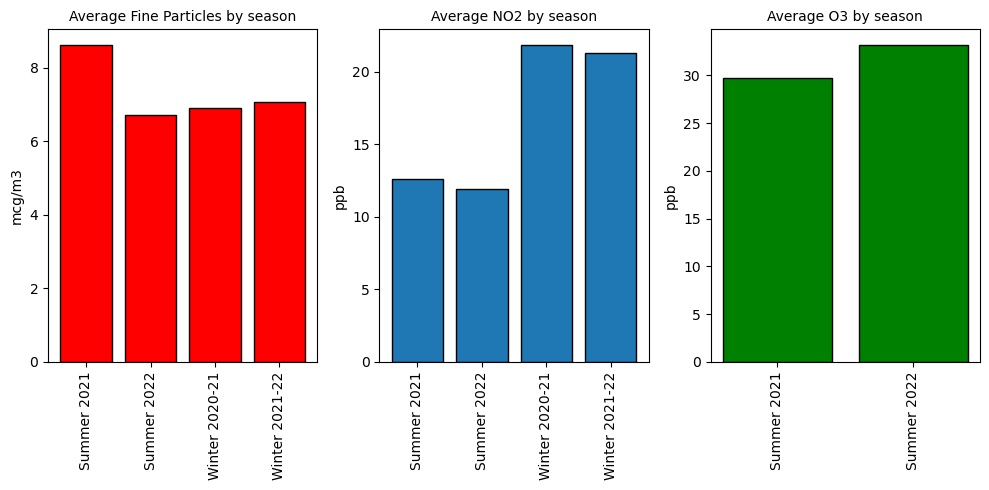

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].bar(bar_plot_data['season'],bar_plot_data['Fine particles (PM 2.5)'], color = 'red', edgecolor = 'black')
axs[0].set_title('Average Fine Particles by season', fontsize = 10)
axs[0].set_ylabel('mcg/m3')

axs[1].bar(bar_plot_data['season'],bar_plot_data['Nitrogen dioxide (NO2)'], edgecolor = 'black')
axs[1].set_title('Average NO2 by season', fontsize = 10)
axs[1].set_ylabel('ppb')

axs[2].bar(bar_plot_data['season'],bar_plot_data['Ozone (O3)'], color = 'green', edgecolor = 'black')
axs[2].set_title('Average O3 by season', fontsize = 10)
axs[2].set_ylabel('ppb')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=90)


plt.tight_layout()

plt.show()

The above plots show the average values for each pollutant by the four seasons of interest.

Now that I plotted the average values by season, I am curious to see what the distribution of the individual observations for each polutant look like.

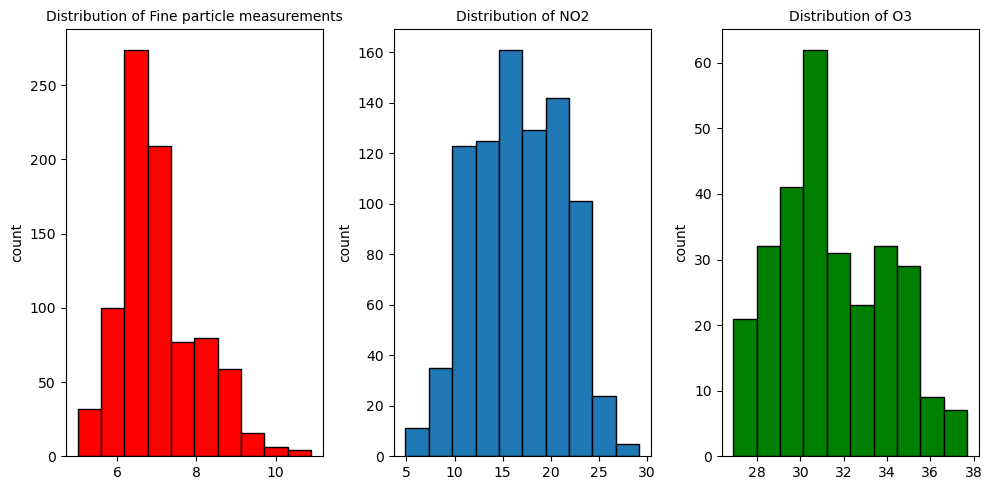

In [22]:

fig2, axs2 = plt.subplots(1, 3, figsize=(10,5))
axs2[0].hist(x = data_pivoted_hist['Fine particles (PM 2.5)'], color = 'red', edgecolor = 'black')
axs2[0].set_title('Distribution of Fine particle measurements', fontsize = 10)
axs2[0].set_ylabel('count')

axs2[1].hist(x = data_pivoted_hist['Nitrogen dioxide (NO2)'], edgecolor = 'black')
axs2[1].set_title('Distribution of NO2', fontsize = 10)
axs2[1].set_ylabel('count')

axs2[2].hist(x = data_pivoted_hist['Ozone (O3)'], color = 'green', edgecolor = 'black')
axs2[2].set_title('Distribution of O3', fontsize = 10)
axs2[2].set_ylabel('count')


plt.tight_layout()

plt.show()

The above plots shows the distribution of measurments of each polutant type across all time periods.

### Visualizations - Seaborn

First, I will recreate the bar plots in seaborn

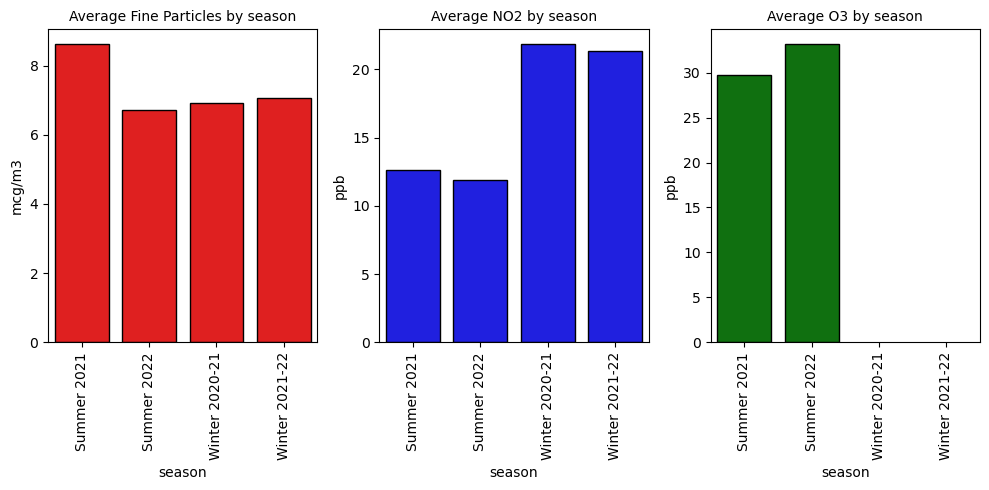

In [23]:
fig_sns_bar, axs_sns_bar = plt.subplots(1, 3, figsize=(10,5))

sns.barplot(ax = axs_sns_bar[0], x = bar_plot_data['season'], y = bar_plot_data['Fine particles (PM 2.5)'], 
            color = 'red', edgecolor = 'black')

axs_sns_bar[0].set_title('Average Fine Particles by season', fontsize = 10)
axs_sns_bar[0].set_ylabel('mcg/m3')


sns.barplot(ax = axs_sns_bar[1], x = bar_plot_data['season'], y = bar_plot_data['Nitrogen dioxide (NO2)'],
           color = 'blue', edgecolor = 'black')

axs_sns_bar[1].set_title('Average NO2 by season', fontsize = 10)
axs_sns_bar[1].set_ylabel('ppb')


sns.barplot(ax = axs_sns_bar[2], x = bar_plot_data['season'], y = bar_plot_data['Ozone (O3)'], 
            color = 'green', edgecolor = 'black')

axs_sns_bar[2].set_title('Average O3 by season', fontsize = 10)
axs_sns_bar[2].set_ylabel('ppb')

for ax in axs_sns_bar.flat:
    ax.tick_params(axis='x', rotation=90)

                 
plt.tight_layout()

plt.show()


I recreated the bar plots with Seaborn and there are two main differences:
-Seaborn automatically included an x-axis label (season) which Matplotlib did not automatically include
-Matplotlibe automatically excluded the Winter measurments for O3 (which were NaN) while Seaborn did not.

Next, I recreate the histograms in Seaborn

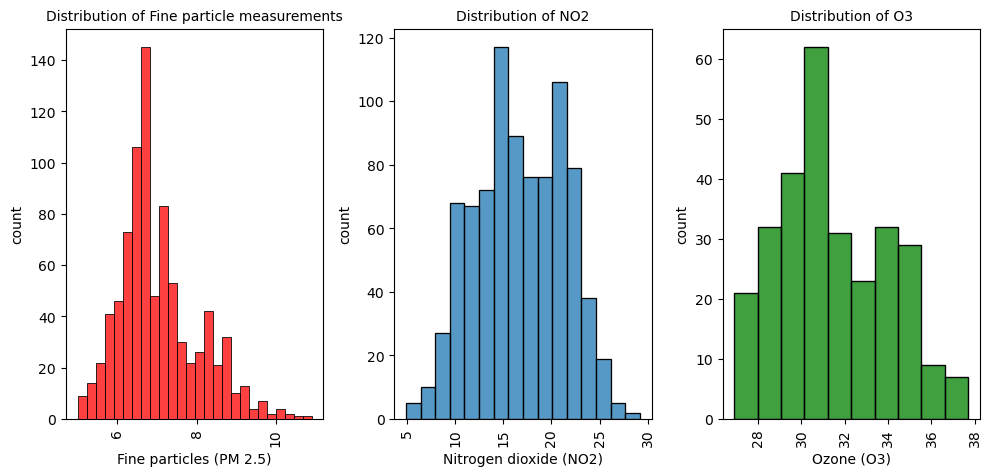

In [24]:
fig_sns_hist, axs_sns_hist = plt.subplots(1, 3, figsize=(10,5))

sns.histplot(ax = axs_sns_hist[0], x = data_pivoted_hist['Fine particles (PM 2.5)'], color = 'red')

axs_sns_hist[0].set_title('Distribution of Fine particle measurements', fontsize = 10)
axs_sns_hist[0].set_ylabel('count')


sns.histplot(ax = axs_sns_hist[1], x = data_pivoted_hist['Nitrogen dioxide (NO2)'])

axs_sns_hist[1].set_title('Distribution of NO2', fontsize = 10)
axs_sns_hist[1].set_ylabel('count')


sns.histplot(ax = axs_sns_hist[2], x = data_pivoted_hist['Ozone (O3)'], color = 'green')

axs_sns_hist[2].set_title('Distribution of O3', fontsize = 10)
axs_sns_hist[2].set_ylabel('count')

for ax in axs_sns_hist.flat:
    ax.tick_params(axis='x', rotation=90)

                 
plt.tight_layout()

plt.show()

I recreated the histograms with Seaborn and there is one main difference
-Seaborn defaulted to a higher number of bins than Matplotlib

The Seaborn Bar plots and histograms are displaying the same information as the Matplotlib plots
-average polutant measurments by season for the bar plots
-distribution of polutant measurements across the four seasons of interest for the three different polutants

### Part 3

Because I created plots with subplots, there wasn't too much difference in creating the plots in Seaborn and Matplotlib, besides smaller things like Seaborn automatically including an x-axis label for the bar plot, Seaborn not dropping NaNs for the O3 bar plot, and Seaborn defaulting to a larger number of bins for the histograms

However, for plots that do not include subplots, Seaborn is usually able to generate the plots with less lines of code and with more information (such as automatically including lables). Additionally, Seaborn plots tend to be more visualy appealing. However, the trade-off is that Seaborn plots are less customizable. Matplotlib may be more appropriate in scenarios where the plots need to be standardized to a specific company standard.

### Conclusion

This data-set contained air quality measurements in NYC for different air polutants in various time periods. I filtered the data-set to look at Summer 2021, Summer 2022, Winter 20-21, and Winter 21-22 observations.

The bar plots showed the following:
-The average fine particles measurement slightly decreased summer over summer and slightly increased winter over winter.
-The average NO2 measurement decreased summer over summer and winter over winter.
-The average O3 measurement increased summer over summer.

-Across the four time periods, the Fine Particles distribution had a right skew
-Across the four time periods, the NO2 distribution seemed leptokurtic.
-Across the two time periods, the O3 distribution had a right skew.